In [1]:
#Importemos las librerías necesarias

import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
#Call the database

wd = "facebook_mock.csv"

df = pd.read_csv(wd)
df.head()

,Page.total.likes,Type,Category,Post.Month,Post.Weekday,Post.Hour,Paid,LPost.Tot.Reach,LPost.Tot.Impressions,Lifetime.Engaged.Users,LPost.Consumers,LPost.Consumptions,LPost.Liked.Page.Impressions,LPost.Liked.Page.Reach,LPeople.Post.Like...Engange,comment,like,share,Total.Interactions,Clus_km
0,139441,Photo,2,12,4,3,0,2752,5091,178,109,159,3078,1640,119,4,79,17,100,0
1,139441,Status,2,12,3,10,0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,29,164,0
2,139441,Photo,3,12,3,3,0,2413,4373,177,113,154,2812,1503,132,0,66,14,80,0
3,139441,Photo,2,12,2,10,1,50128,87991,2211,790,1119,61027,32048,1386,58,1572,147,1777,1
4,139441,Photo,2,12,2,3,0,7244,13594,671,410,580,6228,3200,396,19,325,49,393,1


In [3]:
#Name of columns
list(df.columns) 

['Page.total.likes',
 'Type',
 'Category',
 'Post.Month',
 'Post.Weekday',
 'Post.Hour',
 'Paid',
 'LPost.Tot.Reach',
 'LPost.Tot.Impressions',
 'Lifetime.Engaged.Users',
 'LPost.Consumers',
 'LPost.Consumptions',
 'LPost.Liked.Page.Impressions',
 'LPost.Liked.Page.Reach',
 'LPeople.Post.Like...Engange',
 'comment',
 'like',
 'share',
 'Total.Interactions',
 'Clus_km']

In [4]:
#Quitamos la columna con el objetivo.
X = df[['Page.total.likes','Type','Category', 'Post.Month', 'Post.Weekday', 'Post.Hour', 'Paid',
        'LPost.Tot.Reach', 'LPost.Tot.Impressions', 'Lifetime.Engaged.Users', 'LPost.Consumers', 'LPost.Consumptions',
         'LPost.Liked.Page.Impressions',
         'LPost.Liked.Page.Reach',
         'LPeople.Post.Like...Engange', 'comment', 'like', 'share']].values
X[0:5]

array([[139441, 'Photo', 2, 12, 4, 3, 0, 2752, 5091, 178, 109, 159, 3078,
        1640, 119, 4, 79, 17],
       [139441, 'Status', 2, 12, 3, 10, 0, 10460, 19057, 1457, 1361,
        1674, 11710, 6112, 1108, 5, 130, 29],
       [139441, 'Photo', 3, 12, 3, 3, 0, 2413, 4373, 177, 113, 154, 2812,
        1503, 132, 0, 66, 14],
       [139441, 'Photo', 2, 12, 2, 10, 1, 50128, 87991, 2211, 790, 1119,
        61027, 32048, 1386, 58, 1572, 147],
       [139441, 'Photo', 2, 12, 2, 3, 0, 7244, 13594, 671, 410, 580,
        6228, 3200, 396, 19, 325, 49]], dtype=object)

In [5]:
#Reescribamos la columna Type pues tupo character
from sklearn import preprocessing
le_type = preprocessing.LabelEncoder()
le_type.fit(['Photo','Status', 'Link','Video'])
X[:,1] = le_type.transform(X[:,1]) 

In [6]:
X[0:5]

array([[139441, 1, 2, 12, 4, 3, 0, 2752, 5091, 178, 109, 159, 3078, 1640,
        119, 4, 79, 17],
       [139441, 2, 2, 12, 3, 10, 0, 10460, 19057, 1457, 1361, 1674,
        11710, 6112, 1108, 5, 130, 29],
       [139441, 1, 3, 12, 3, 3, 0, 2413, 4373, 177, 113, 154, 2812, 1503,
        132, 0, 66, 14],
       [139441, 1, 2, 12, 2, 10, 1, 50128, 87991, 2211, 790, 1119, 61027,
        32048, 1386, 58, 1572, 147],
       [139441, 1, 2, 12, 2, 3, 0, 7244, 13594, 671, 410, 580, 6228,
        3200, 396, 19, 325, 49]], dtype=object)

In [7]:
#Ahora extraemos la variable objetivo
y = df["Clus_km"]
y[0:5]

0    0
1    0
2    0
3    1
4    1
Name: Clus_km, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [10]:
X_trainset.shape

(501, 18)

In [11]:
y_trainset.shape

(501,)

In [12]:
X_testset.shape

(215, 18)

In [13]:
y_testset.shape

(215,)

In [14]:
#También normalizamos los datos
#Importamos el modulo para normalizar datos
from sklearn import preprocessing
#Normalizamos las características https://scikit-learn.org/stable/modules/preprocessing.html
my_scaler = preprocessing.StandardScaler()

#Ajustamos
X = my_scaler.fit(X).transform(X)
#Pedimos que nos muestre las primeras filas
X[0:5]

array([[ 0.98254124, -0.29022476,  0.05613374,  1.45753574, -0.02814123,
        -1.04379008, -0.65726707, -0.76822538, -0.54084906, -1.01307798,
        -0.95092883, -0.84252927, -0.41381179, -0.90220583, -1.01016851,
        -0.5707645 , -0.69402799, -0.69395929],
       [ 0.98254124,  1.67016136,  0.05613374,  1.45753574, -0.53186919,
         0.59309224, -0.65726707, -0.45569106, -0.32768621,  0.24812423,
         0.36596176, -0.04253662, -0.23019671, -0.41230384,  0.52233707,
        -0.49736877, -0.52650115, -0.32022868],
       [ 0.98254124, -0.29022476,  1.23824433,  1.45753574, -0.53186919,
        -1.04379008, -0.65726707, -0.78197073, -0.55180788, -1.01406407,
        -0.94672151, -0.84516951, -0.41946999, -0.91721401, -0.99002435,
        -0.86434738, -0.73673091, -0.78739195],
       [ 0.98254124, -0.29022476,  0.05613374,  1.45753574, -1.03559716,
         0.59309224,  1.52145155,  1.15271726,  0.72445241,  0.99163202,
        -0.23463291, -0.33560324,  0.81884693,  2.428

In [17]:
#Llamamos a la función train_test_split
from sklearn.model_selection import train_test_split
#Dividimos los datos originales, dejando el 20% de ellos como conjunto de prueba. Fijamos la semilla en 4.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
#Pedimos que nos muestre el tamaño del conjunto de entrenamiento y el de prueba
print ('Conjunto de entrenamiento:', X_train.shape,  y_train.shape)
print ('Conjunto de prueba:', X_test.shape,  y_test.shape)

Conjunto de entrenamiento: (572, 18) (572,)
Conjunto de prueba: (144, 18) (144,)


k: 1, Train/Test Score: 1.000/0.931
k: 3, Train/Test Score: 0.967/0.924
k: 5, Train/Test Score: 0.955/0.944
k: 7, Train/Test Score: 0.949/0.938
k: 9, Train/Test Score: 0.948/0.944
k: 11, Train/Test Score: 0.949/0.931
k: 13, Train/Test Score: 0.944/0.924
k: 15, Train/Test Score: 0.948/0.931
k: 17, Train/Test Score: 0.948/0.931
k: 19, Train/Test Score: 0.942/0.931


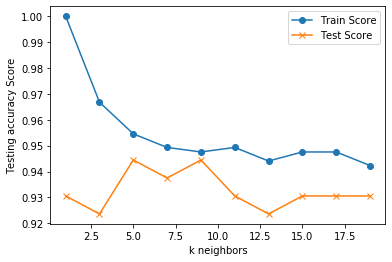

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o',label="Train Score")
plt.plot(range(1, 20, 2), test_scores, marker="x",label="Test Score")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend()
plt.show()

k: 1, Train/Test Score: 1.000/0.931
k: 3, Train/Test Score: 0.967/0.924
k: 5, Train/Test Score: 0.955/0.944
k: 7, Train/Test Score: 0.949/0.938
k: 9, Train/Test Score: 0.948/0.944
k: 11, Train/Test Score: 0.949/0.931
k: 13, Train/Test Score: 0.944/0.924
k: 15, Train/Test Score: 0.948/0.931
k: 17, Train/Test Score: 0.948/0.931
k: 19, Train/Test Score: 0.942/0.931
k: 21, Train/Test Score: 0.946/0.931
k: 23, Train/Test Score: 0.941/0.931
k: 25, Train/Test Score: 0.939/0.938
k: 27, Train/Test Score: 0.937/0.931
k: 29, Train/Test Score: 0.935/0.924


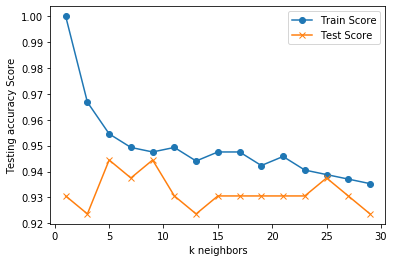

In [21]:
train_scores = []
test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 2), train_scores, marker='o',label="Train Score")
plt.plot(range(1, 30, 2), test_scores, marker="x",label="Test Score")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.legend()
plt.show()

In [27]:
# Note that k: 3 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('k=5 Test Acc: %.3f' % knn.score(X_test, y_test))

k=5 Test Acc: 0.944
